|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Partho Protim | Das | Partho, 09/12/24 | 5 | 12.5 |
| Member 2: | Kajal Deb | Nath | Kajal, 09/12/24| 5| 12.5 |
| Member 3: | Rony  | Paul  | Rony, 09/12/24 | 5 | 12.5 |
| Member 4: | Abraham | Tesfamichael | Abraham, 09/12/2024 | 5 | 12.5 |
| Member 5: | Gagan | Kataria | Gagan, 09/12/24 | 5 | 12.5 |
| Member 6: | Shakil | Ahmed | Shakil, 09/12/24 | 5 | 12.5 |
| Member 7: | Augustine | Ojumah | Augustine, 09/12/24 | 5 | 12.5 |
| Member 8: | First Name | Last Name | Signature | Hours | Contribution |

In [ ]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 90.2 MB/s eta 0:00:00


Partho

In [ ]:
!pip install geopandas


In [ ]:
!pip install rasterio geopandas matplotlib numpy pandas

import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

print("All packages installed and ready to use!")


All packages installed and ready to use!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Digital Engineering Project

/content/drive/MyDrive/Digital Engineering Project


In [ ]:
!ls

'Calgary temp_Veg_2015-2023'    NDVI			      'Phoniex temp_veg_2015-2023'
'Dhaka NDVI and Surface temp'  'Paris NDIV and Surface temp'  'Sydney NDVI and Surface temp'


In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define folder paths for temperature and NDVI GeoTIFF files
temp_folder_path = '/content/drive/MyDrive/Digital Engineering Project/Calgary temp_Veg_2015-2023/'
ndvi_folder_path = '/content/drive/MyDrive/Digital Engineering Project/NDVI/Calgary NDVI 2015-2023/'

# Lists to store temperature and NDVI data
temp_data_list = []
ndvi_data_list = []

# Loop through temperature files
for file_name in os.listdir(temp_folder_path):
    if file_name.endswith('.tif'):
        file_path = os.path.join(temp_folder_path, file_name)

        # Open the GeoTIFF file for temperature
        with rasterio.open(file_path) as src:
            temp_data = src.read(1)  # Read the first band
            temp_data_list.append(temp_data)
            print(f"Loaded temperature data from {file_name}")

# Loop through NDVI files
for file_name in os.listdir(ndvi_folder_path):
    if file_name.endswith('.tif'):
        file_path = os.path.join(ndvi_folder_path, file_name)

        # Open the GeoTIFF file for NDVI
        with rasterio.open(file_path) as src:
            ndvi_data = src.read(1)  # Read the first band
            ndvi_data_list.append(ndvi_data)
            print(f"Loaded NDVI data from {file_name}")

# Convert lists to numpy arrays for further analysis
temp_data_array = np.array(temp_data_list)
ndvi_data_array = np.array(ndvi_data_list)

print(f"Total Temperature Files Loaded: {len(temp_data_list)}")
print(f"Total NDVI Files Loaded: {len(ndvi_data_list)}")


Loaded temperature data from Calgary_Surface_Temperature_2015.tif
Loaded temperature data from Calgary_Surface_Temperature_2016.tif
Loaded temperature data from Calgary_Surface_Temperature_2017.tif
Loaded temperature data from Calgary_Surface_Temperature_2018.tif
Loaded temperature data from Calgary_Surface_Temperature_2019.tif
Loaded temperature data from Calgary_Surface_Temperature_2020.tif
Loaded temperature data from Calgary_Surface_Temperature_2021.tif
Loaded temperature data from Calgary_Surface_Temperature_2022.tif
Loaded temperature data from Calgary_Surface_Temperature_2023.tif
Loaded NDVI data from Calgary_NDVI_2015.tif
Loaded NDVI data from Calgary_NDVI_2016.tif
Loaded NDVI data from Calgary_NDVI_2017.tif
Loaded NDVI data from Calgary_NDVI_2019.tif
Loaded NDVI data from Calgary_NDVI_2018.tif
Loaded NDVI data from Calgary_NDVI_2021.tif
Loaded NDVI data from Calgary_NDVI_2020.tif
Loaded NDVI data from Calgary_NDVI_2022.tif
Loaded NDVI data from Calgary_NDVI_2023.tif
Total Temp

Khajal

In [ ]:
import os
import rasterio
import numpy as np
from rasterio.warp import reproject, Resampling

def resample_raster(src_array, src_transform, src_crs, src_shape, target_shape):
    """
    Resample a raster to a target shape using nearest neighbor resampling.
    """
    # Calculate the scale factors for resampling
    scale_y = src_shape[0] / target_shape[0]
    scale_x = src_shape[1] / target_shape[1]

    # Prepare an empty array for the resampled data
    resampled_array = np.empty(target_shape, dtype=src_array.dtype)

    # Resample the raster using nearest neighbor
    reproject(
        source=src_array,
        destination=resampled_array,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=src_transform * src_transform.scale(scale_x, scale_y),
        dst_crs=src_crs,
        resampling=Resampling.nearest
    )

    return resampled_array

# Assuming you have data for 9 years (2015-2023) based on global variables
num_years = len(temp_data_list)  # Get the number of years from the temperature data list
# OR
# num_years = len(os.listdir(ndvi_folder_path)) # Or if both folders have the same number of files

# Resample NDVI data to match the temperature data shape
resampled_ndvi_list = []
for i in range(num_years):
    with rasterio.open(ndvi_folder_path + os.listdir(ndvi_folder_path)[i]) as ndvi_src:
        ndvi_data = ndvi_src.read(1)
        ndvi_resampled = resample_raster(
            ndvi_data, ndvi_src.transform, ndvi_src.crs, ndvi_data.shape, temp_data_list[i].shape
        )
        resampled_ndvi_list.append(ndvi_resampled)

# Convert to numpy array for further analysis
ndvi_data_array = np.array(resampled_ndvi_list)

In [ ]:
correlation_list = []

# Calculate the correlation between resampled NDVI and temperature data for each year
for i in range(num_years):
    # Flatten the arrays to 1D
    temp_flat = temp_data_list[i].flatten()
    ndvi_flat = ndvi_data_array[i].flatten()

    # Remove NaN values from both arrays
    valid_mask = ~np.isnan(temp_flat) & ~np.isnan(ndvi_flat)
    temp_clean = temp_flat[valid_mask]
    ndvi_clean = ndvi_flat[valid_mask]

    # Calculate correlation for the current year
    if len(temp_clean) > 0 and len(ndvi_clean) > 0:
        corr = np.corrcoef(temp_clean, ndvi_clean)[0, 1]
        correlation_list.append(corr)
        print(f"Correlation between NDVI and Surface Temperature in Year {2015 + i}: {corr:.2f}")
    else:
        print(f"Insufficient valid data for Year {2015 + i}. Skipping correlation calculation.")


Correlation between NDVI and Surface Temperature in Year 2015: -0.03
Correlation between NDVI and Surface Temperature in Year 2016: -0.50
Correlation between NDVI and Surface Temperature in Year 2017: -0.50
Correlation between NDVI and Surface Temperature in Year 2018: -0.41
Correlation between NDVI and Surface Temperature in Year 2019: -0.41
Correlation between NDVI and Surface Temperature in Year 2020: -0.43
Correlation between NDVI and Surface Temperature in Year 2021: -0.33
Correlation between NDVI and Surface Temperature in Year 2022: -0.55
Correlation between NDVI and Surface Temperature in Year 2023: -0.09


Rony

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2015: Slope = -0.61, Intercept = 30.30, R2 = 0.00, RMSE = 3.64


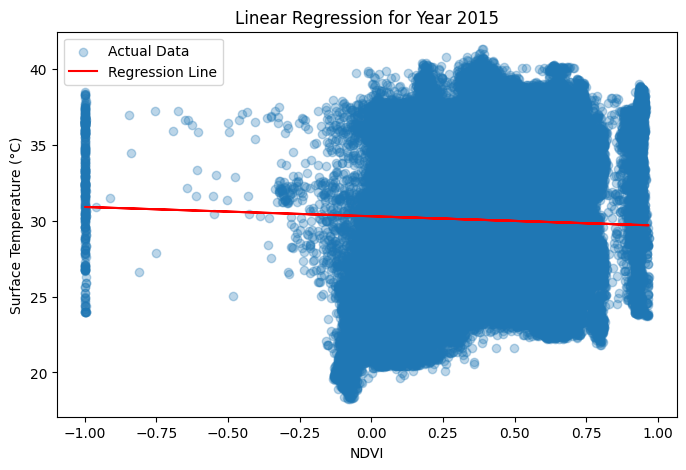

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2016: Slope = -10.43, Intercept = 37.02, R2 = 0.25, RMSE = 3.91


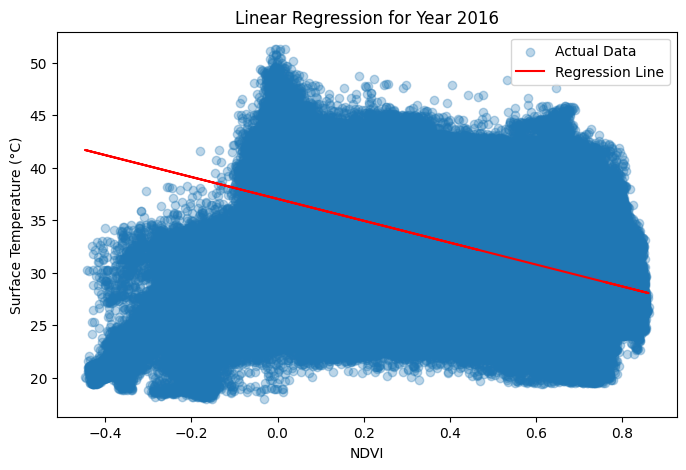

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2017: Slope = -10.86, Intercept = 38.44, R2 = 0.25, RMSE = 3.59


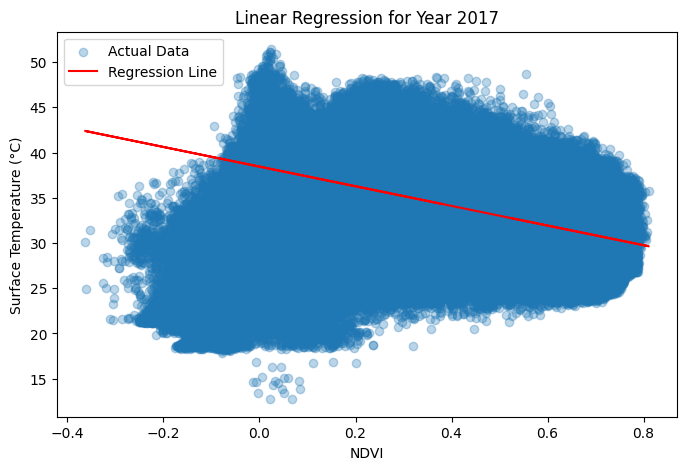

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2018: Slope = -7.30, Intercept = 38.26, R2 = 0.17, RMSE = 3.59


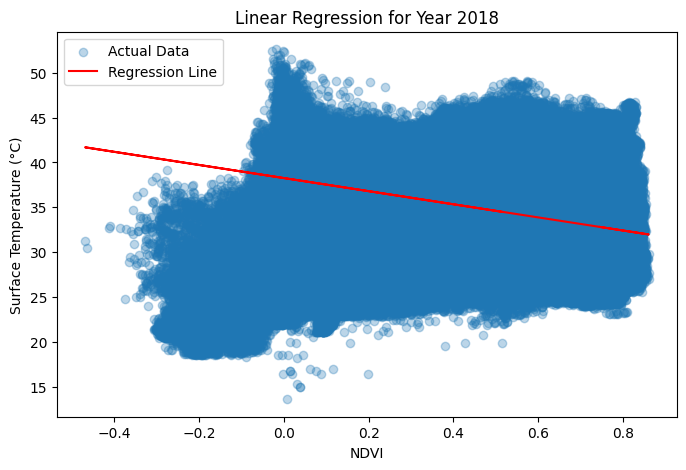

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2019: Slope = -15.53, Intercept = 35.51, R2 = 0.17, RMSE = 6.73


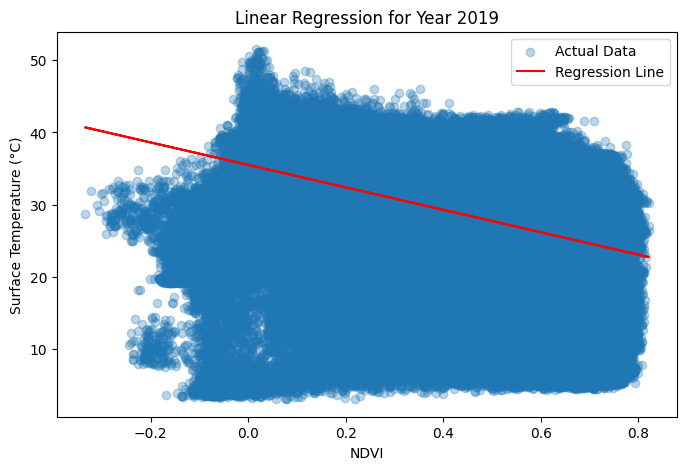

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2020: Slope = -12.16, Intercept = 31.64, R2 = 0.19, RMSE = 4.53


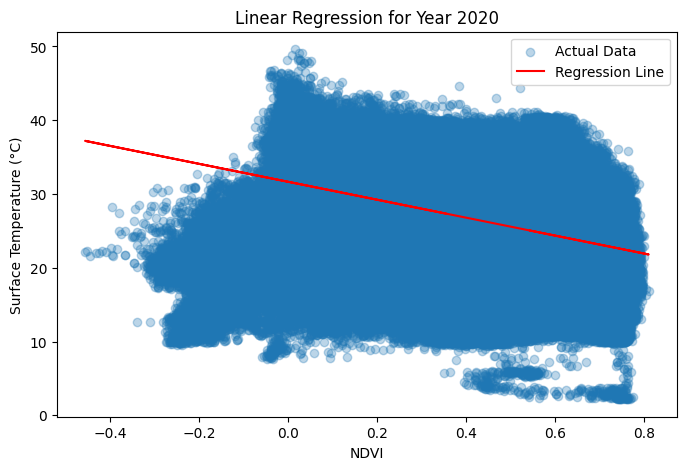

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2021: Slope = -6.32, Intercept = 38.74, R2 = 0.11, RMSE = 3.93


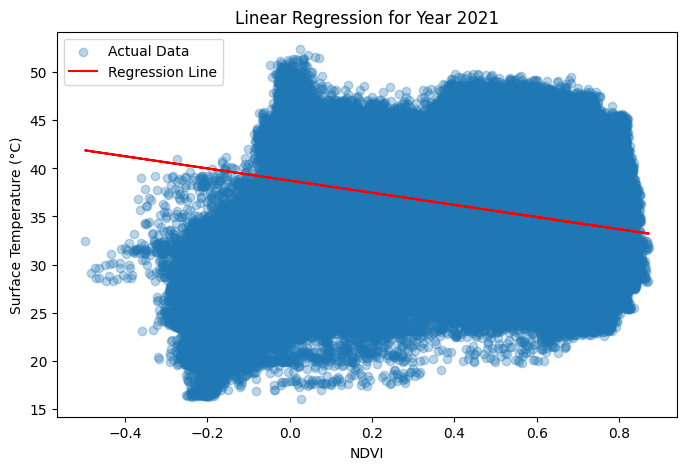

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2022: Slope = -16.81, Intercept = 40.87, R2 = 0.31, RMSE = 3.65


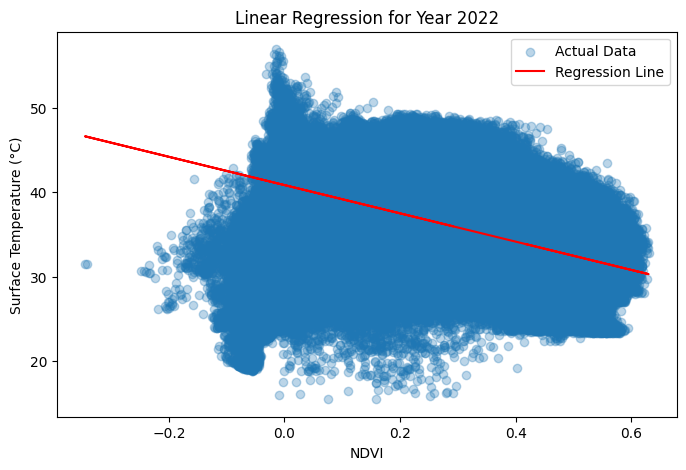

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Year 2023: Slope = -6.82, Intercept = 33.10, R2 = 0.01, RMSE = 8.81


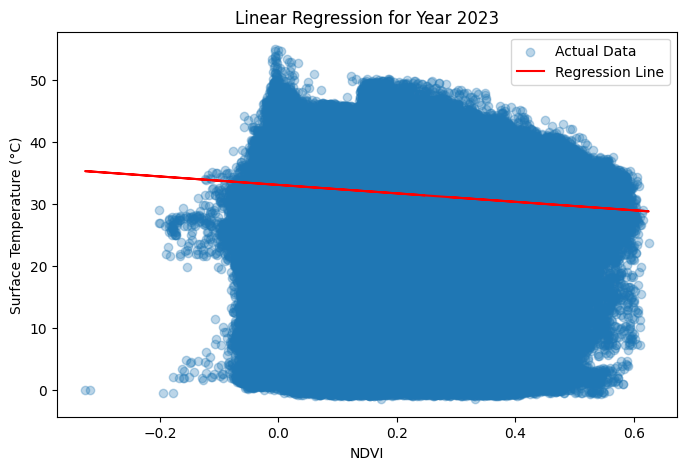

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# List to store regression results
regression_results = []

# Loop through each year to perform linear regression
for i in range(num_years):
    # Flatten and clean the arrays
    temp_flat = temp_data_list[i].flatten()
    ndvi_flat = ndvi_data_array[i].flatten()

    # Remove NaN values from both arrays
    valid_mask = ~np.isnan(temp_flat) & ~np.isnan(ndvi_flat)
    temp_clean = temp_flat[valid_mask]
    ndvi_clean = ndvi_flat[valid_mask]

    # Reshape NDVI data to fit the linear regression model
    ndvi_reshaped = ndvi_clean.reshape(-1, 1)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(ndvi_reshaped, temp_clean)

    # Make predictions
    temp_pred = model.predict(ndvi_reshaped)

    # Calculate R-squared and RMSE
    r2 = r2_score(temp_clean, temp_pred)
    rmse = mean_squared_error(temp_clean, temp_pred, squared=False)

    # Store results
    regression_results.append({'year': 2015 + i, 'slope': model.coef_[0],
                               'intercept': model.intercept_, 'r2': r2, 'rmse': rmse})

    # Print results for each year
    print(f"Year {2015 + i}: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}, R2 = {r2:.2f}, RMSE = {rmse:.2f}")

    # Plot the results for each year
    plt.figure(figsize=(8, 5))
    plt.scatter(ndvi_clean, temp_clean, alpha=0.3, label='Actual Data')
    plt.plot(ndvi_clean, temp_pred, color='red', label='Regression Line')
    plt.xlabel('NDVI')
    plt.ylabel('Surface Temperature (°C)')
    plt.title(f'Linear Regression for Year {2015 + i}')
    plt.legend()
    plt.show()


Abraham

In [ ]:
import matplotlib.pyplot as plt
import rasterio.plot

def plot_all_years_heatmaps(temp_data_list, ndvi_data_array, start_year=2015):
    """
    Plot NDVI and surface temperature heatmaps for all years in the data.
    """
    num_years = len(temp_data_list)

    for year_index in range(num_years):
        # Get data for the specific year
        temp_data = temp_data_list[year_index]
        ndvi_data = ndvi_data_array[year_index]

        # Create a figure with subplots for temperature and NDVI
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))

        # Plot surface temperature heatmap
        ax[0].set_title(f'Surface Temperature - {start_year + year_index}')
        temp_plot = ax[0].imshow(temp_data, cmap='hot', vmin=20, vmax=45)
        fig.colorbar(temp_plot, ax=ax[0], label='Temperature (°C)')

        # Plot NDVI heatmap
        ax[1].set_title(f'NDVI - {start_year + year_index}')
        ndvi_plot = ax[1].imshow(ndvi_data, cmap='Greens', vmin=0, vmax=1)
        fig.colorbar(ndvi_plot, ax=ax[1], label='NDVI')

        plt.tight_layout()
        plt.show()

# Call the function to plot all years' heatmaps
plot_all_years_heatmaps(temp_data_list, ndvi_data_array)


Gagan

In [ ]:
!pip install --upgrade pip setuptools
!pip install --force-reinstall pytest
!pip install lightgbm


  Using cached pytest-8.3.4-py3-none-any.whl.metadata (7.5 kB)
  Using cached exceptiongroup-1.2.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
Using cached pytest-8.3.4-py3-none-any.whl (343 kB)
Using cached exceptiongroup-1.2.2-py3-none-any.whl (16 kB)
Using cached pluggy-1.5.0-py3-none-any.whl (20 kB)
Using cached tomli-2.2.1-py3-none-any.whl (14 kB)
Using cached iniconfig-2.0.0-py3-none-any.whl (5.9 kB)
Using cached packaging-24.2-py3-none-any.whl (65 kB)
  Attempting uninstall: tomli
    Found existing installation: tomli 2.2.1
    Uninstalling tomli-2.2.1:
      Successfully uninstalled tomli-2.2.1
  Attempting uninstall: pluggy
    Found existing installation: pluggy 1.5.0
    Uninstalling pluggy-1.5.0:
      Successfully uninstalled plug

In [ ]:
from lightgbm import LGBMRegressor
print("LightGBM successfully imported!")


LightGBM successfully imported!


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


NEW ONE BARCHTING

In [ ]:
import os
import rasterio
import numpy as np

# Paths to temperature and NDVI folders
temp_folder_path = '/content/drive/MyDrive/Digital Engineering Project/Calgary temp_Veg_2015-2023/'
ndvi_folder_path = '/content/drive/MyDrive/Digital Engineering Project/NDVI/Calgary NDVI 2015-2023/'

# Function to load raster files
def load_raster_data(folder_path):
    data_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):
            with rasterio.open(os.path.join(folder_path, file_name)) as src:
                data = src.read(1)  # Read the first band
                data_list.append(data)
    return np.array(data_list)

# Load temperature and NDVI data
temp_data_array = load_raster_data(temp_folder_path)
ndvi_data_array = load_raster_data(ndvi_folder_path)

print(f"Loaded {len(temp_data_array)} temperature files and {len(ndvi_data_array)} NDVI files.")


Loaded 9 temperature files and 9 NDVI files.


Shakil

In [ ]:
from rasterio.warp import reproject, Resampling

def resample_raster(source_array, source_transform, source_crs, target_shape, target_transform, target_crs):
    resampled_array = np.empty(target_shape, dtype=source_array.dtype)
    reproject(
        source=source_array,
        destination=resampled_array,
        src_transform=source_transform,
        src_crs=source_crs,
        dst_transform=target_transform,
        dst_crs=target_crs,
        resampling=Resampling.average
    )
    return resampled_array

# Resample NDVI to match temperature resolution
resampled_ndvi_list = []
with rasterio.open(temp_folder_path + os.listdir(temp_folder_path)[0]) as temp_src:
    temp_transform = temp_src.transform
    temp_crs = temp_src.crs
    temp_shape = temp_src.shape

for file_name in os.listdir(ndvi_folder_path):
    if file_name.endswith('.tif'):
        with rasterio.open(os.path.join(ndvi_folder_path, file_name)) as ndvi_src:
            resampled_ndvi = resample_raster(
                source_array=ndvi_src.read(1),
                source_transform=ndvi_src.transform,
                source_crs=ndvi_src.crs,
                target_shape=temp_shape,
                target_transform=temp_transform,
                target_crs=temp_crs
            )
            resampled_ndvi_list.append(resampled_ndvi)

ndvi_data_array = np.array(resampled_ndvi_list)


In [ ]:
import pandas as pd

# Flatten data for each year and create a combined DataFrame
data = []
years = list(range(2015, 2015 + len(temp_data_array)))

for i, year in enumerate(years):
    temp_flat = temp_data_array[i].flatten()
    ndvi_flat = ndvi_data_array[i].flatten()
    valid_mask = ~np.isnan(temp_flat) & ~np.isnan(ndvi_flat)
    temp_clean = temp_flat[valid_mask]
    ndvi_clean = ndvi_flat[valid_mask]
    year_array = [year] * len(temp_clean)
    data.extend(zip(ndvi_clean, temp_clean, year_array))

# Create a DataFrame
df = pd.DataFrame(data, columns=['NDVI', 'Surface_Temperature', 'Year'])
print(f"Prepared DataFrame with {len(df)} rows.")


Prepared DataFrame with 27265906 rows.


Augustine

In [ ]:
from lightgbm import LGBMRegressor
import numpy as np

# Batch size
batch_size = 500000

# Initialize the LightGBM model
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)

# Train the model in batches
for start in range(0, len(df), batch_size):
    end = min(start + batch_size, len(df))
    batch = df.iloc[start:end]
    X_batch = batch[['NDVI', 'Year']].to_numpy()
    y_batch = batch['Surface_Temperature'].to_numpy()

    # Train incrementally
    lgb_model.fit(X_batch, y_batch, init_model=lgb_model if start > 0 else None)

print("Batch training completed.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 500000, number of used features: 2
[LightGBM] [Info] Start training from score 30.095791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 500000, number of used features: 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Use a subset of the data for testing
test_data = df.sample(frac=0.2, random_state=42)
X_test = test_data[['NDVI', 'Year']].to_numpy()
y_test = test_data['Surface_Temperature'].to_numpy()

# Predict and evaluate
y_pred = lgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Batch Model - R2: {r2:.2f}, RMSE: {rmse:.2f}")


Batch Model - R2: -0.89, RMSE: 8.51


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
future_years = list(range(2024, 2034))
ndvi_grid = ndvi_data_array[-1]  # Use 2023 NDVI as the base
ndvi_flat = ndvi_grid.flatten()

predicted_temp_maps = {}
for year in future_years:
    year_flat = np.full_like(ndvi_flat, year)
    input_data = np.column_stack((ndvi_flat, year_flat))
    valid_mask = ~np.isnan(ndvi_flat)
    input_data_valid = input_data[valid_mask]
    predicted_temp_flat = lgb_model.predict(input_data_valid)

    # Create 2D grid for predictions
    predicted_temp_grid = np.full_like(ndvi_flat, np.nan)
    predicted_temp_grid[valid_mask] = predicted_temp_flat
    predicted_temp_maps[year] = predicted_temp_grid.reshape(ndvi_grid.shape)


Tony

In [ ]:
import matplotlib.pyplot as plt

for year, temp_grid in predicted_temp_maps.items():
    plt.figure(figsize=(10, 8))
    plt.imshow(temp_grid, cmap='hot', vmin=20, vmax=45)
    plt.colorbar(label='Predicted Surface Temperature (°C)')
    plt.title(f'Predicted Surface Temperature for {year}')
    plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results
print(f"Model Accuracy - R²: {r2:.2f}, RMSE: {rmse:.2f}")


Model Accuracy - R²: -0.89, RMSE: 8.51


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
mbe = np.mean(y_pred - y_test)
print(f"Mean Bias Error (MBE): {mbe:.2f}")


Mean Bias Error (MBE): 4.08


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 6.63


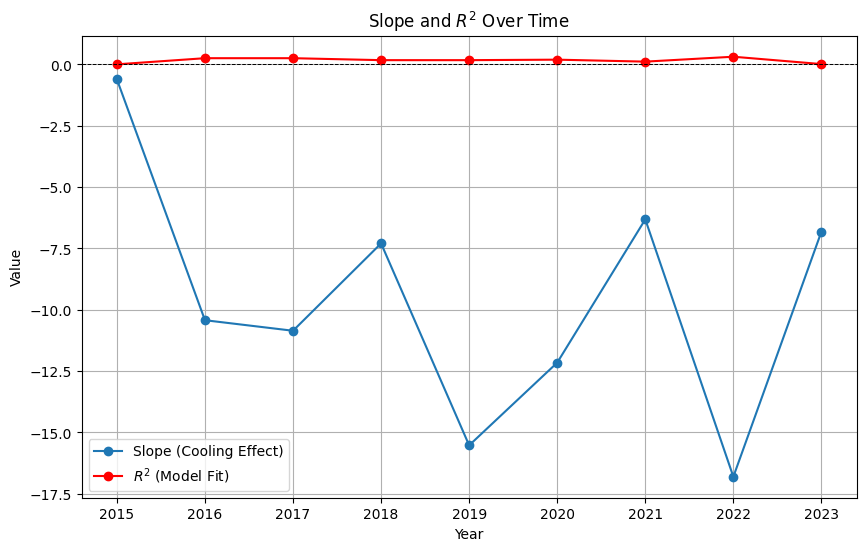

In [ ]:
import matplotlib.pyplot as plt

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
slopes = [-0.61, -10.43, -10.86, -7.30, -15.53, -12.16, -6.32, -16.81, -6.82]
r2_values = [0.00, 0.25, 0.25, 0.17, 0.17, 0.19, 0.11, 0.31, 0.01]

plt.figure(figsize=(10, 6))
plt.plot(years, slopes, marker='o', label='Slope (Cooling Effect)')
plt.plot(years, r2_values, marker='o', label='$R^2$ (Model Fit)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Slope and $R^2$ Over Time')
plt.legend()
plt.grid(True)
plt.show()
